# Negative Binomial Distribution

---

## Import

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statistics
from scipy import stats

%matplotlib inline
plt.style.use("fivethirtyeight")

---

## Utilities

In [2]:
def get_discrete_ticks(xmin, xmax):
    cuts = [5, 10, 20, 50, 100, 200, 500, 1000]
    ticks = np.arange(xmin, xmax + 1)
    if len(ticks) > 15:
        for cut in cuts:
            ticks = [tick for tick in ticks if tick % cut == 0]
            if len(ticks) <= 15:
                return ticks
        return ticks
    return ticks

In [3]:
def get_bins(xmin, xmax, step = 1):
    bins = np.arange(xmin, xmax, step)
    bins = bins if len(bins) > 2 else get_bins(xmin, xmax + 1, step)
    return bins if len(bins) <= 100 \
        else get_bins(xmin, xmax, step = step + 1)

In [4]:
def plot_discrete_distribution(f, x_axis, obs = None, q = None, **kwargs):
    pmf = f.pmf(x_axis, **kwargs)
    fig, ax = plt.subplots(figsize = (8, 4))
    bars = ax.bar(x_axis, pmf, edgecolor = "k", linewidth = 2)
    
    print(f"Mean: {f.mean(**kwargs)}")
    print(f"Median: {f.median(**kwargs)}")
    print(f"Variance: {f.var(**kwargs)}")
    print(f"Standard Deviation: {f.std(**kwargs)}")
    print("-" * 10)
    if obs:
        plt.setp(bars[obs - x_axis.min()], color = "r", linewidth = 2)
        plt.setp(bars[obs - x_axis.min()], edgecolor = "k")
        obs_pmf = f.pmf(obs, **kwargs)
        print(f"PMF({obs}) = {obs_pmf}")
        
    plt.xticks(get_discrete_ticks(xmin = x_axis.min(), xmax = x_axis.max()))
    plt.show()

In [5]:
def sample_discrete_distribution(f, size = 1, seed = None, **kwargs):
    sample = f.rvs(size = size, random_state = seed, **kwargs)
    
    print(f"Min: {np.min(sample)}")
    print(f"Mean: {np.mean(sample)}")
    print(f"Median: {np.median(sample)}")
    print(f"Max: {np.max(sample)}")
    print(f"Variance: {np.var(sample, ddof = 0)}")
    print(f"Standard Deviation: {np.std(sample, ddof = 0)}")
    
    fig, ax = plt.subplots(figsize = (8, 4))
   
    plt.hist(x = sample,
             density = True,
             edgecolor = "k",
             bins = get_bins(sample.min(), sample.max() + 1),
             linewidth = 2)

    plt.xticks(get_discrete_ticks(sample.min(), sample.max()))
    plt.show()
    return sample

---

La binomiale negativa è una sorta di generalizzazione della geometrica, perché modella il numero di trial necessari non per ottenere il primo successo, bensì per ottenere il successo r-esimo.

La generica variabile $X$, quindi, rappresenta il numero di trial necessari per arrivare al successo r-esimo.

Il successo r-esimo avviene al trial x-esimo solo se nei precedenti $x-1$ trial si verificano esattamente $r-1$ successi, e questa probabilità possiamo calcolarla con la formula binomiale:

$$\large \binom{x-1}{r-1}p^{r-1}(1-p)^{(x-1)-(r-1)}$$

La probabilità che al trial x-esimo ci sia un successo, infine, è semplicemente pari a $p$.

Possiamo moltiplicare queste due probabilità perché gli eventi sono indipendenti, ottenendo la *PMF* della binomiale negativa:

$$\large P(X=x)=\binom{x-1}{r-1}p^{r}(1-p)^{(x-r)}$$

Per completezza includiamo anche l'**expectation** e la **variance**:

$$\large E(X)=\frac{r}{p}\;\;\;\;\;Var(X)=\frac{r(1-p)}{p^2}$$

---

#### Probability Mass Function

Mean: 6.666666666666668
Median: 6.0
Variance: 11.111111111111114
Standard Deviation: 3.333333333333334
----------


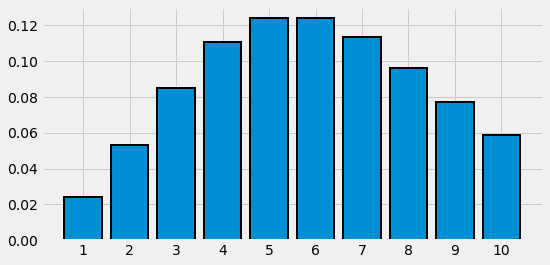

In [6]:
p = 0.6
n = 10

plot_discrete_distribution(f = stats.nbinom,
                           x_axis = np.arange(1, n + 1),
                           p = p,
                           n = n)

---

#### RVS

Min: 0
Mean: 6.502
Median: 6.0
Max: 22
Variance: 10.687996
Standard Deviation: 3.26925006691137


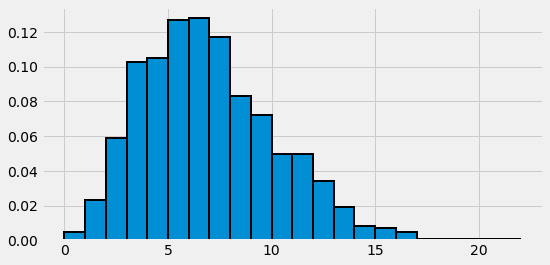

In [7]:
p = 0.6
n = 10

sample = sample_discrete_distribution(f = stats.nbinom,
                                      size = 1000,
                                      p = p,
                                      n = n)

---

**[Esempio]** Un operatore di call-center deve completare altri 3 survey prima che il lavoro finisca. Per ogni numero chiamato randomicamente, c'è un 9% di possibilità di raggiungere una persona che completerà il survey. Qual è la probabilità che il terzo survey sia completato alla decima chiamata?

In [8]:
max_trials = 10
number_of_successes = 3
prob_single_success = 0.09

stats.nbinom.pmf(k = max_trials,
                 n = number_of_successes,
                 p = prob_single_success)

0.018736367107134555

---